In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
# load the dataset
df = pd.read_csv("D://M_AI//Machine Learning//Demo Datasets//Lesson 4//train.csv")
df.shape

(891, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
# check for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# drop the irrelated columns
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# check the age median
df['Age'].median()

28.0

In [10]:
# define age function to remove null values
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 22
    else:
        return Age

In [11]:
df.groupby(df.Pclass).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [12]:
# applying the age finvtion to remove null values
df['Age'] = df[['Age','Pclass']].apply(age_approx,axis=1)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
# dropping the embarked null values
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
# check the data types of columns
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [16]:
# get dummies to change Sex and Embarked dtypes ie from categorical to numerical values
df_dummied = pd.get_dummies(df,columns=['Sex'])
df_dummied = pd.get_dummies(df_dummied,columns=['Embarked'])
df_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

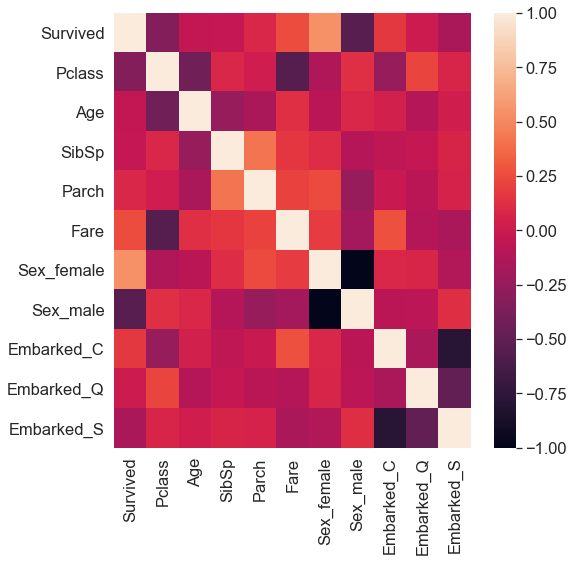

In [17]:
# check the correlation using the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_dummied.corr())

In [18]:
used_features = ['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
X = df_dummied[used_features].values
y = df.Survived

In [19]:
# split train and test data sets
X_Train,X_test,y_Train,y_test = train_test_split(X,y,test_size=0.3,random_state=None)

print(X_Train.shape)
print(X_test.shape)
print(y_Train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [20]:
# call logistic regression 
logReg = LogisticRegression()
logReg.fit(X_Train,y_Train)

LogisticRegression()

In [21]:
y_pred = logReg.predict(X_test)

In [22]:
metrics.confusion_matrix(y_test,y_pred)

array([[150,  23],
       [ 21,  73]], dtype=int64)

In [23]:
metrics.accuracy_score(y_test,y_pred)

0.8352059925093633

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       173
           1       0.76      0.78      0.77        94

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267



In [25]:
# print coefficients and intercepts
print(logReg.coef_)
print(logReg.intercept_)

[[-1.11312704 -0.04049975 -0.30829842 -0.02029053  1.22225686 -1.21976132
   0.20188916  0.11339479 -0.31278841]]
[3.88825743]


In [26]:
# predict surviving probability
survive_prob = logReg.predict_proba(X_test)
print(survive_prob)

[[0.86699746 0.13300254]
 [0.13264064 0.86735936]
 [0.34912376 0.65087624]
 [0.86225752 0.13774248]
 [0.86759207 0.13240793]
 [0.86699746 0.13300254]
 [0.2702147  0.7297853 ]
 [0.91691606 0.08308394]
 [0.21678067 0.78321933]
 [0.27858688 0.72141312]
 [0.76251872 0.23748128]
 [0.86699746 0.13300254]
 [0.57961908 0.42038092]
 [0.81140066 0.18859934]
 [0.90193533 0.09806467]
 [0.84343191 0.15656809]
 [0.67110474 0.32889526]
 [0.80976511 0.19023489]
 [0.84718213 0.15281787]
 [0.25312244 0.74687756]
 [0.86699746 0.13300254]
 [0.89870941 0.10129059]
 [0.8363982  0.1636018 ]
 [0.51118234 0.48881766]
 [0.26343681 0.73656319]
 [0.2702147  0.7297853 ]
 [0.80049135 0.19950865]
 [0.56363059 0.43636941]
 [0.96809978 0.03190022]
 [0.9430079  0.0569921 ]
 [0.74851446 0.25148554]
 [0.9137782  0.0862218 ]
 [0.4741305  0.5258695 ]
 [0.93901841 0.06098159]
 [0.22259657 0.77740343]
 [0.23609847 0.76390153]
 [0.79467472 0.20532528]
 [0.86654936 0.13345064]
 [0.89260843 0.10739157]
 [0.05342747 0.94657253]


In [27]:
survive_prob.shape

(267, 2)

In [28]:
df_test= pd.read_csv("D://test.csv")
df_test.shape

(418, 11)

AttributeError: 'NoneType' object has no attribute 'isnull'